# Lecture 2 : Introduction to NumPy and Pandas

Data science and machine learning relies on the ability to easily manipulate large amounts of data, and to efficiently do numerical calculation on this data. This gives rise to series of libraries specialised in dealing with this problem. The strength of the Python 'ecosystem' is that these libraries usually work well together. A central part of the Python ecosystem for data science is the combination of NumPy ('Numerical Python') and Pandas ('Python Data Analysis Library').

NumPy is the block on which Pandas is build, so we will briefly explore the main concepts in NumPy. We will then focus on Pandas, as you will need to use this library extensively in the rest of the course. If you walk away with nothing else from this course, at least know how to use Pandas for your data analysis projects!

## Learning Objectives
1. Understand how array computing avoids bugs and speeds up analysis
2. Basics of NumPy NDArrays
3. Loading data in Pandas
4. Basic terminology of Pandas Series and Dataframes
5. Obtaining basic statistics from dataframes
6. Numerical computation with dataframes
7. Merging data and deleting data


## 2.0 General Introduction to NumPy
<a id="intro"></a>

In [1]:
from IPython.display import IFrame
display(IFrame('https://youtube.com/embed/NLqkYpK0PsI', width = 640, height = 360))

## 2.1 Introduction to NumPy <a id="npintro"></a>

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. NumPy was formally created in 2005 by Travis Oliphant but it incorporates features of the competing former libraries Numarray into Numeric, with extensive modifications. NumPy is open-source software and has many contributors.

Let's explore how NumPy works. First, let's make sure you are familiar with how to import external libraries into a notebook. Feel free to skip to the next section if you are familiar with this.

Before you can import a library into your notebook, you need to install it into your system. We did this last week. If you want to learn more about this (it's not very complicated) you can check the documentation for the ['pip install' command](https://pip.pypa.io/en/stable/reference/pip_install/) or the ['conda install' command](https://docs.conda.io/projects/conda/en/latest/commands/install.html), depending on whether you are using a regular distribution of Python or an Anaconda distribution of Python.

Once a library is installed locally on your system, you can use the **import** command to import the library. You will need to do this for any library you want to use in a notebook (or in your VSCode file). You did not have to do this up to now because in *Lecture 1* you only used standard Python command. But NumPy and Pandas are not standard packages. The syntax to import an entire library is easy:

```python
import name_of_library as local_name_you_want
```

The local name is a shortname that you can use in your notebook. And you only need to import a library once per notebook for it to be available in all of your cells. The NumPy library name is 'numpy' (case sensitive) and it is convention to use the shortname 'np' for it. Following conventions ensures your code is more readable: so stick to it. So let's import the libary:

In [2]:
import numpy as np
# or you can also import numpy as numpy, its just a convention

Now let's go straight to business with why NumPy is so important. Below we will use the 'arrange' method of NumPy to create a NumPy array containing 1 million numbers. We will also create a plain vanilla Python list containing the same 1 million numbers. Let's do this now:

In [3]:
my_arr = np.arange(1000000) # The NumPy way -> we obtain an NumPy NDArray
my_list = list(range(1000000)) # Plain Python -> We obtain a simple Python list

The goal is to compare the speed of arithmetic operations between NumPy and plain vanilla python. Remember that NumPy is backed by linear algebra (matrix operations) and it's core is written in C (a low-level compiled language). Plain vanilla Python is an interpreted language, so every command needs to be interpreted first before it is run.

We will use a magic command ('%') called 'time' which returns the time that a given operation takes. Let's first multiply the numbers by 2 using the NumPy calculation and timing it:

In [4]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 28.9 ms


Now let's do that same using plain vanilla Python and a list comprehension:

In [5]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 1.1 s


And this was a very simple operation, on 'only' 1 million numbers. On my system, the plain vanilla Python is about 40 times slower. It should now be clear to you why NumPy and Pandas (which uses NumPy behind the scene) are so important.

## 2.2 The NumPy ndarray: A Multidimensional Array Object <a id="intro"></a>

Under the hood, the field of data science and machine learning is concerned with vectors, matrix, and tensor operations. NumPy provide exactly this ability, and the tool for that is known as an 'ndarray' or multidimentionsl array object. You used an `ndarray` in your previous exercise.

In [6]:
from IPython.display import IFrame
display(IFrame('https://youtube.com/embed/eSMb1Xe2svM', width = 640, height = 360))

### 2.2.1 Creating ndarrays <a id="creatingarrays"></a>

Arrays can easily be creared using the 'array' method of NumPy:

In [7]:
# Let's create a Python list
data1 = [6, 7.5, 8, 0, 1]

# And turn it into an array
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

The preceding example shows how to create a vector, i.e. a 1D array. We can create 2D arrays by giving a nested list of list to NumPy:

In [8]:
#
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

We can confirm the dimensions of our array by using the 'ndim' method:

In [9]:
arr2.ndim

2

And we can see the 'shape' of our array, i.e. the size of each dimension, by calling the 'shape' method:

In [10]:
arr2.shape

(2, 4)

We see above that the shape of my array is a matrix (2 dimensions) of vectors of dimension 4. Because shape returns a tuple, I can extract the dimension of any axis by giving an argument to the return value. For instance, here I can extract the dimension of the second axis:

In [11]:
arr2.shape[1]

4

To create an array with a range of number, use the 'arange' method:

In [12]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

You can also give a starting value, end value, and step to the range function. The code below will create an `ndarray` starting at 50 and ending at 100 (not inclusive of the last value), and taking every 2 values (step of 2):

In [13]:
np.arange(50,100,2)

array([50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82,
       84, 86, 88, 90, 92, 94, 96, 98])

### 2.2.2 Arithmetic with NumPy Arrays <a id="numpyarithmetic"></a>

One of the most powerful features of NumPy is that you can treat arrays (and thus matrices and tensors) as you would scalar, and thus you can do batch operations very efficiently. Let's demonstrate with an example:

In [14]:
# Let's create a 2D array
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

If we multiply two arrays, the result is that each number in the first array is multiplied by the number in the same position of the second array. This is known as an elementwise operation. So for instance we can square our array:

In [15]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

And if we subtract values, the same rule applies. Try to predict the result of this cell before you run it.

In [16]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Arithmetic operations that use scalars propagate the scalar in the operation. For instance, the math below will result in 1/x for all x's in the array:

In [17]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

And this will put each number in the array to the power of 0.5, which is the same as a square root

In [18]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

### 2.2.3 Mathematical and Statistical Methods <a id="npstatisticalmethods"></a>

NumPy arrays come with a range of built-in mathematical and statistical methods that can be extremely useful. Let's first create an array for random numbers

In [19]:
arr = np.random.randn(5, 6)
arr

array([[-1.21840702,  0.4258351 ,  0.11022413,  1.51518287, -1.72988508,
        -0.25867742],
       [-0.80999501, -0.44000265, -0.67861726,  1.02023708,  0.33455384,
         0.46852673],
       [-0.22213615, -0.79607049,  1.162566  ,  0.18213668, -1.1696146 ,
         0.45752384],
       [-2.3605793 ,  0.64947117,  0.11817386,  0.79964956, -1.61928834,
        -0.40725533],
       [ 0.65111219,  0.37241292, -0.89619143,  0.25232386,  0.94948335,
         0.21891699]])

We can easily find the mean of the array with this method:

In [20]:
arr.mean()

-0.09727966411977226

We can also find the sum of all the elements in the array:

In [21]:
arr.sum()

-2.918389923593168

But what if we are only interested in the sum mean per column? 
When can pass an axis parameter to the method. Rows are on axis 0, and columns on axis 1. More complex ndarrays can have additional axis (an infinity of them). Taking the mean of each column results in an array of a lower dimension, in our case, a row vector:

In [22]:
arr.mean(axis=0)

array([-0.79200106,  0.04232921, -0.03676894,  0.75390601, -0.64695017,
        0.09580696])

This will produce the sum along each column:

In [23]:
arr.sum(axis=1)

array([-1.15572743, -0.10529727, -0.38559473, -2.81982837,  1.54805789])

Sometimes it can be useful to look at the cummulative sum at each location in your array, starting from position zero.
`cumsum` will do just that, add the previous value to the local value in the array, and propagate the result forward

In [24]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

Of course you can also do this on a single axis. Let's create a martix and take the cummulative sum along axis 0:

In [25]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [26]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

We can also do a cummulative product. Let's do this along the column axis this time:

In [27]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

## 2.2.4 Indexing and slicing arrays <a id="slicing"></a>

It is often useful to 'slice' an array to obtain a smaller, subarray. Whilst doing this, you might also obtain an array with different indexes. As usual for Python, ndarrays are index with 0 being the first position. Let's first look at a simple case where we slice a 1D array. This is not so different than slicing a Python array:

In [28]:
# Create an array
my_arr = np.array([0,1,2,3,4,5,6,7,8,9])

# Slice from 3-4, i.e. start at position 3 and stop at position 4 (remember the last position is not included):
my_arr[3:5]

array([3, 4])

In [29]:
# If you omit one of the two terms of the slice, you obtain all values from/to the value you give:
my_arr[:5]

array([0, 1, 2, 3, 4])

In [30]:
# Or from the 5th position to the end:
my_arr[4:]

array([4, 5, 6, 7, 8, 9])

Note that NumPy arrays can also be sliced and indexed from the last position. So for instance, to know the value of the last element in my array I don't need to know its size, I can simply do this:

In [31]:
my_arr[-1]

9

And of course I can index in the same way. For instance, here I take everything from the 2nd (position 1 with zero indexing) to the 6th position (10-3 but the last value is not included):

In [32]:
my_arr[1:-3]

array([1, 2, 3, 4, 5, 6])

Arrays with higher dimensions are a bit more trick to deal with.

In [33]:
my_arr2 = np.array([[1,2,3],[4,5,6],[7,8,9]])
my_arr2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [34]:
# You can extract the columns (axis 1) of this data very simply:
my_arr2[0]

array([1, 2, 3])

In [35]:
# You can slice as well, to obtain the first 2 columns for instance:
my_arr2[0:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [36]:
# You can also slice through the higher dimensions by adding a slice argument separated by a comma. For instance, this 
# slice will give you the first row of the first 2 columns:
my_arr2[0:2,0:1]

array([[1],
       [4]])

In [37]:
my_arr2[:1]

array([[1, 2, 3]])

In [38]:
my_arr2[1]

array([4, 5, 6])

In [39]:
my_arr2[1:7]

array([[4, 5, 6],
       [7, 8, 9]])

In [40]:
my_arr2[1:1]

array([], shape=(0, 3), dtype=int32)

In [41]:
my_arr2[2:3]

array([[7, 8, 9]])

In [42]:
my_arr2[2:]

array([[7, 8, 9]])

In [43]:
my_arr2[3:6]

array([], shape=(0, 3), dtype=int32)

## Exercise 1 
<a id="x1"></a>

You now have all the elements to do meaningful calculations using ndarrays. We will apply this to a simple example. You are asked to calculate the sedimentation rate in a given well. For this, you are provided with an ndarry of dimension 2 (a matrix). The first vector column represents the depth below seafloor of a stratigraphic marker [**in meters**]. The second column represents the age of the marker in millions of years.

You have two objectives in this exercise:
1. To produce a martix that shows the sedimentation rate between each marker in cm/kyr. Note that the units are different than the units you were given above, so you will need to account for that.
2. I also want to know what the average sedimentation for this site is.

Exercise parameters:
1. You cannot use any type of loops
2. As a hint, you will need to use indexing and slicing. 
3. Keep in mind that you can make several different slices from the original dataset. 
4. Also don't loose sight that a sedimentation rate is calculated *between* two points in a well. So if you have n age points, there will be n-1 sedimentation rates


In [44]:
# The ndarray below represents age in the first column vs burial depth in the second column
age_vs_depth = np.array([[0.5,2.1,3.0,6.1,9.3,12.4,15.3,16.2,16.3,20.1,40.2,41.3,55.2],
                         [15.0,35.0,100.3,160.3,180.4,220.5,241.2,255.0,258.3,312.1,312.1,320.3,380.1]])

In [45]:
#Your Code:
new_array = age_vs_depth[:1]*100/age_vs_depth[1]
new_array

array([[ 3.33333333,  6.        ,  2.99102692,  3.80536494,  5.15521064,
         5.62358277,  6.34328358,  6.35294118,  6.31049168,  6.44024351,
        12.88048702, 12.89416172, 14.52249408]])

In [46]:
new_array.mean()

7.127124721280539

## 2.3 Getting Started with pandas <a id="intropandas"></a>

Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license.The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individual observations.Its name is a play on the phrase "Python data analysis" itself. Wes McKinney started building what would become Pandas at AQR Capital while he was a researcher there from 2007 to 2010.

In [47]:
from IPython.display import IFrame
display(IFrame('https://youtube.com/embed/jox3od5OB4k', width = 640, height = 360))

Let's first import Pandas as the entire library. However, we also want to be able to refer to the object 'Series' and 'DataFrame' in Pandas, so we will also import specifically these from Pandas. For this, we use this syntax:

```python
from your_library import object1, object2, ..., objectX
```

In [48]:
import pandas as pd
from pandas import Series, DataFrame

### 2.3.1 Reading Data into Pandas <a id="readpandas"></a>

We could go on with programmatic examples and simple arrays turned into pandas objects. That is what most computing courses do. But we are interested in geological data, so rather than do this, let's learn how we can load REAL data into pandas before we play with it.

The data I selected is simply geochemical data collected from the Ocean Drilling Program (ODP) Leg 198 (Walvis Ridge), specifically from ODP Site 1207. The data is stored as a comma separated text file ('.cvs') in the `Data` folder where this notebook is located.

Opening the dataset could not be easier:

In [49]:
geochemistry_df = pd.read_csv('Data/1207_Geochemistry.csv')
geochemistry_df

,Leg,Site,H,Cor,T,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
0,198,1207,A,2,H,2,65,6.95,69.630
1,198,1207,A,2,H,5,33,11.13,49.314
2,198,1207,A,3,H,1,66,14.96,76.000
3,198,1207,A,3,H,2,126,17.06,55.478
4,198,1207,A,3,H,4,70,19.50,46.981
...,...,...,...,...,...,...,...,...,...
66,198,1207,B,40,R,CC,30,526.80,60.930
67,198,1207,B,44,R,1,60,565.60,0.000
68,198,1207,B,44,R,1,76,565.76,0.000
69,198,1207,B,44,R,1,103,566.03,0.000


It's almost magical how this happens! This data structure (here the variable named `geochemistry_df` is known as a 'DataFrame', or 'df' for short. You can think of it as an excel spreadsheet on steroid, as it can have more than 2 dimensions (thought it gets hard to visualise it then). The `Dataframe` has an index (here from 0 to 70), and several `Series` which you can think of as the columns. As discussed, this is all backed by a NumPy array.

Because we will be using ODP/IODP data extensively in this course, let's define what the different data represent.

* **Leg** refers to the particular expedition the drill ship was on. In more recent IODP cruises, this is referred to as the 'Expedition' or 'Exp'.
* **Site** means the name of the general area that was drilled, which is a sequential number. Then we have the 'Hole' named 'H' here. A hole is essentially a well, and a site can containt multiple nearby wells.
* **Cor** is short for core number 
* **T** is a letter representing the tool used for coring. 
* **Sc** designates the section of the core: each 9.8 meters-long core is cut into 1.5 meters sections for easy handling, with the addition of the core catcher ('CC') which represents material not in the core liner. 
* **Top(cm)** gives the cm down from the top of the section where the sample is located.

Thus, an ODP/IODP sample can be fully characterized by the combination of the parameters we have seen so far. for instance, the first sample in this dataframe is ODP Sample **198-1207-A-2-H-2-65**.

* **Depth (mbsf)** is the depths below seafloor (in meters) of any sample and it can be calculated if you know the full sample name. 
* **CaCO3 (wt %)**: Finally, the last series (or column) is the % carbonate data measured at this location. 

Comma Separated Values (CSV) is a common format, but not the only existing one. In fact, Pandas can read multiple format just as easily, including JSON, Parket, and Excel, amongst others. Let's open a second dataframe but this time using the Excel format:

In [50]:
ngr_df = pd.read_excel('Data/1207_NGR.xls')
ngr_df

,Leg,Site,H,Cor,T,Sc,Top(cm),Depth (mbsf),Corr. Counts
0,198,1207,A,1,H,1,30,0.3,20.08
1,198,1207,A,1,H,1,60,0.6,17.48
2,198,1207,A,1,H,1,90,0.9,17.75
3,198,1207,A,1,H,1,120,1.2,20.22
4,198,1207,A,1,H,2,30,1.8,19.22
...,...,...,...,...,...,...,...,...,...
741,198,1207,B,49,R,1,50,613.7,24.12
742,198,1207,B,49,R,1,60,613.8,21.45
743,198,1207,B,49,R,1,70,613.9,15.22
744,198,1207,B,49,R,1,80,614.0,11.92


As you can see, it was just as easy. Excel and CSV are probably some of the most common format you will be using. Note that it is easier to open the old '.xls' files than the newer '.xlsx' files and this is done on purpose: you can install an extension to open the xlsx but it is not recommended as there are potential safety issues around this.

The only column that is different fom the previous dataframe is the last one, the 'Corr. Counts' or 'corrected counts':
* **Corr. Counts** is the natural gamma radiation measured on the cores. 

### 2.3.2 Dropping Entries from an Axis <a id="dropping"></a>

Sometimes you want to drop an entry from a dataframe. For instance, to drop the hole name (well name) from the dataset, we can use the 'drop' command in two ways:
```python
df.drop(columns=['column1', 'column2', ...])
```
Or
```python
df.drop(['column1', 'column2', ...], axis=1) # Remember that axis 1 is the column axis, axis 0 the rows in a matrix
```
By default, the 'drop()' method is applied to the rows. So if you don't stipulate the axis, you can use to to drop rows like this:
```python
df.drop(['row1', 'row2', ...]) 
```
Of course if you give it a column name you will receive an error. However, the drop() command can have a bit of a counter intuitive effect. Let's try to drop the well name below, and see if the result is what you expect:

In [51]:
geochemistry_df.drop(columns=['H'])
geochemistry_df

,Leg,Site,H,Cor,T,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
0,198,1207,A,2,H,2,65,6.95,69.630
1,198,1207,A,2,H,5,33,11.13,49.314
2,198,1207,A,3,H,1,66,14.96,76.000
3,198,1207,A,3,H,2,126,17.06,55.478
4,198,1207,A,3,H,4,70,19.50,46.981
...,...,...,...,...,...,...,...,...,...
66,198,1207,B,40,R,CC,30,526.80,60.930
67,198,1207,B,44,R,1,60,565.60,0.000
68,198,1207,B,44,R,1,76,565.76,0.000
69,198,1207,B,44,R,1,103,566.03,0.000


Can you spot the problem? The `H` column is still in our dataframe. So what did we do wrong? 

### Operations 'in place' in Pandas

Surprisingly, the fact that the colum `H` above is not dropped is a big feature of Pandas. It comes from one of the core concept of functional programming that stipulates that data structures should remain unchanged, i.e. are 'immutable'. So the natural default for most Pandas operations is to not change the existing dataframe, and instead return a new structure. So to understand the behaviour we have above, let's break down what happened:

* We asked Pandas to drop column `H` from our dataframr
* Pandas created a copy of our dataframe
* Pandas droped `H` from the copy
* We asked Pandas to display the original `geochemistry_df` which of course is unchanged.

So how to we deal with this? There are two ways to do that. First and probably the best way, we simply capture the new dataframe in a new variable:

In [52]:
mod_df = geochemistry_df.drop(columns=['H'])
mod_df

,Leg,Site,Cor,T,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
0,198,1207,2,H,2,65,6.95,69.630
1,198,1207,2,H,5,33,11.13,49.314
2,198,1207,3,H,1,66,14.96,76.000
3,198,1207,3,H,2,126,17.06,55.478
4,198,1207,3,H,4,70,19.50,46.981
...,...,...,...,...,...,...,...,...
66,198,1207,40,R,CC,30,526.80,60.930
67,198,1207,44,R,1,60,565.60,0.000
68,198,1207,44,R,1,76,565.76,0.000
69,198,1207,44,R,1,103,566.03,0.000


It worked! But imagine now a situation where we have a dataset of several gigabites. What would happen then? Because we created a copy of this dataframe and kept the original copy in memory, we are going to run out of computer memory very soon.

This is why sometimes it makes sense to do operations no the actual data itself. Of course, one approach is to reassign the new dataframe to the same variable name:

In [53]:
geochemistry_df = geochemistry_df.drop(columns=['H'])
geochemistry_df

,Leg,Site,Cor,T,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
0,198,1207,2,H,2,65,6.95,69.630
1,198,1207,2,H,5,33,11.13,49.314
2,198,1207,3,H,1,66,14.96,76.000
3,198,1207,3,H,2,126,17.06,55.478
4,198,1207,3,H,4,70,19.50,46.981
...,...,...,...,...,...,...,...,...
66,198,1207,40,R,CC,30,526.80,60.930
67,198,1207,44,R,1,60,565.60,0.000
68,198,1207,44,R,1,76,565.76,0.000
69,198,1207,44,R,1,103,566.03,0.000


But there is a more elegant solution: using the Pandas `inplace` keyword. `inplace` works with most operations in Pandas that would normally return a copy of the data. In other words, the default value for `inplace` is `False` because it returns a copy of the data. Let's do this for our dataset:

In [54]:
# I need to reload the data as I already dropped 'H' in my previous example:
geochemistry_df = pd.read_csv('Data/1207_Geochemistry.csv')

# Using 'inplace':
geochemistry_df.drop(columns=['H'], inplace=True)
geochemistry_df

,Leg,Site,Cor,T,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
0,198,1207,2,H,2,65,6.95,69.630
1,198,1207,2,H,5,33,11.13,49.314
2,198,1207,3,H,1,66,14.96,76.000
3,198,1207,3,H,2,126,17.06,55.478
4,198,1207,3,H,4,70,19.50,46.981
...,...,...,...,...,...,...,...,...
66,198,1207,40,R,CC,30,526.80,60.930
67,198,1207,44,R,1,60,565.60,0.000
68,198,1207,44,R,1,76,565.76,0.000
69,198,1207,44,R,1,103,566.03,0.000


As you can see, this now works as expected. Be careful though, it is easy to get confused with the return values. When `inplace` is `False` the function returns a new dataframe. But when it is true, it returns nothing. So don't combined the two methods, as in the example below:

In [55]:
# Do Not Do This

# I need to reload the data as I already dropped 'H' in my previous example:
geochemistry_df = pd.read_csv('Data/1207_Geochemistry.csv')

# Using 'inplace' and assigning it to the same variable name:
geochemistry_df = geochemistry_df.drop(columns=['H'], inplace=False)

# Let's check of what type this new data is
type(geochemistry_df)

pandas.core.frame.DataFrame

In [56]:
# Do Not Do This

# I need to reload the data as I already dropped 'H' in my previous example:
geochemistry_df = pd.read_csv('Data/1207_Geochemistry.csv')

# Using 'inplace' and assigning it to the same variable name:
geochemistry_df = geochemistry_df.drop(columns=['H'], inplace=True)

# Let's check of what type this new data is
type(geochemistry_df)

NoneType

As you can see, we have a `NoneType` now and of course any operations on this would not work. Let's reload our `geochemistry_df`:

In [57]:
geochemistry_df = pd.read_csv('Data/1207_Geochemistry.csv')

## Exercise 2 

Reload a fresh version of `geochemistry_df` as we erased it with a `NoneType` before. And create a new dataframe (let's call it `geochemistry_mod_df`) that is a copy of `geochmistry_df` but without the well, core and tool columns. Call this new dataframe `geochemistry_mod_df`.

In [58]:
# Your code here

geochemistry_df = geochemistry_df.drop(columns=['Site', 'Cor', 'T'])
geochemistry_mod_df = geochemistry_df
geochemistry_mod_df

,Leg,H,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
0,198,A,2,65,6.95,69.630
1,198,A,5,33,11.13,49.314
2,198,A,1,66,14.96,76.000
3,198,A,2,126,17.06,55.478
4,198,A,4,70,19.50,46.981
...,...,...,...,...,...,...
66,198,B,CC,30,526.80,60.930
67,198,B,1,60,565.60,0.000
68,198,B,1,76,565.76,0.000
69,198,B,1,103,566.03,0.000


### 2.3.4 Indexing, Selection, Filtering and sorting <a id="indexingdf"></a>

This section will further your understanding of how to extract and filter data out of a dataframe. ou can extract one series by calling it by name:

In [59]:
geochemistry_df['CaCO3 (wt %)'] 

0     69.630
1     49.314
2     76.000
3     55.478
4     46.981
       ...  
66    60.930
67     0.000
68     0.000
69     0.000
70    64.200
Name: CaCO3 (wt %), Length: 71, dtype: float64

Watch out, this is case sensitive and typos will lead to a column not found error. **Pro tip:** The 'tab' autocompletion also works for column names in dataframe. So, to avoid an error, if I type `geochemistry_df['Ca <tab>']` Jupyter will auto complete the name.

You can extract more than one series at the time by passing a list of names:

In [60]:
geochemistry_df[['Depth (mbsf)','CaCO3 (wt %)']]

,Depth (mbsf),CaCO3 (wt %)
0,6.95,69.630
1,11.13,49.314
2,14.96,76.000
3,17.06,55.478
4,19.50,46.981
...,...,...
66,526.80,60.930
67,565.60,0.000
68,565.76,0.000
69,566.03,0.000


Note that all of these operations return a new dataframe, so you can save it as a new dataframe to use later in your code if you want:

In [61]:
depth_vs_carbonate_df = geochemistry_df[['Depth (mbsf)','CaCO3 (wt %)']]
depth_vs_carbonate_df

,Depth (mbsf),CaCO3 (wt %)
0,6.95,69.630
1,11.13,49.314
2,14.96,76.000
3,17.06,55.478
4,19.50,46.981
...,...,...
66,526.80,60.930
67,565.60,0.000
68,565.76,0.000
69,566.03,0.000


You can also extract a list of boolean values that fit a criteria. For instance, the following code will return a Series containing the value `True` for samples with `CaCO3 (wt %)` >=50% and `False` otherwise:

In [62]:
geochemistry_df['CaCO3 (wt %)'] >=50

0      True
1     False
2      True
3      True
4     False
      ...  
66     True
67    False
68    False
69    False
70     True
Name: CaCO3 (wt %), Length: 71, dtype: bool

Where it gets intersting is that if you pass a list of boolean to a dataframe, it will filter based on this list and return a new dataframe containing only the rows where the condition is met. So this code results in a new dataframe with samples with carbonate content equal or greater than 50%:

In [63]:
geochemistry_df[geochemistry_df['CaCO3 (wt %)'] >=50]

,Leg,H,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
0,198,A,2,65,6.95,69.630
2,198,A,1,66,14.96,76.000
3,198,A,2,126,17.06,55.478
5,198,A,4,70,29.00,77.950
6,198,A,6,13,31.43,53.978
8,198,A,3,72,37.02,71.010
9,198,A,5,72,40.02,72.750
10,198,A,1,68,43.48,72.620
12,198,A,5,68,49.48,77.150
13,198,A,1,8,52.38,55.644


You can of course filter for more than 1 condition. Notice that I wrap each statement into a '()'. I also separate each statement by an 'AND' Python operator, '&':

In [64]:
geochemistry_df[(geochemistry_df['CaCO3 (wt %)'] >=50) & (geochemistry_df['Depth (mbsf)'] <100)] 

,Leg,H,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
0,198,A,2,65,6.95,69.630
2,198,A,1,66,14.96,76.000
3,198,A,2,126,17.06,55.478
5,198,A,4,70,29.00,77.950
6,198,A,6,13,31.43,53.978
8,198,A,3,72,37.02,71.010
9,198,A,5,72,40.02,72.750
10,198,A,1,68,43.48,72.620
12,198,A,5,68,49.48,77.150
13,198,A,1,8,52.38,55.644


You can also use an 'OR' Python operator, '|'. In this case I get all the samples above 100 mbsf irrespective of carbonate content AND all the samples below 100 mbsf with >=50% carbonates:

In [65]:
geochemistry_df[(geochemistry_df['CaCO3 (wt %)'] >=50) | (geochemistry_df['Depth (mbsf)'] <100)]

,Leg,H,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
0,198,A,2,65,6.95,69.630
1,198,A,5,33,11.13,49.314
2,198,A,1,66,14.96,76.000
3,198,A,2,126,17.06,55.478
4,198,A,4,70,19.50,46.981
...,...,...,...,...,...,...
63,198,B,3,53,189.33,96.710
64,198,B,2,74,197.74,96.910
65,198,B,1,65,205.75,96.600
66,198,B,CC,30,526.80,60.930


You can combine 'OR' and 'AND' logic to your hearts content. The '()' give the order of priority for the operation. In the case below, it will return all the data from the previous query above, but limit it to the samples above 300 mbsf (notice the '&' at the end)

In [66]:
geochemistry_df[((geochemistry_df['CaCO3 (wt %)'] >=50) | (geochemistry_df['Depth (mbsf)'] <100)) & (geochemistry_df['Depth (mbsf)'] <150)]

,Leg,H,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
0,198,A,2,65,6.95,69.630
1,198,A,5,33,11.13,49.314
2,198,A,1,66,14.96,76.000
3,198,A,2,126,17.06,55.478
4,198,A,4,70,19.50,46.981
5,198,A,4,70,29.00,77.950
6,198,A,6,13,31.43,53.978
7,198,A,1,72,34.02,49.980
8,198,A,3,72,37.02,71.010
9,198,A,5,72,40.02,72.750


#### Selection with loc and iloc

You can also access data in your dataframe using the '.loc' method (stands for 'location') and '.iloc' method ('index location').

Let's first use 'loc', and return the `CaCO3 (wt %)` for the rows at index 1 and 10:

In [67]:
geochemistry_df.loc[[1, 10],'CaCO3 (wt %)'] 

1     49.314
10    72.620
Name: CaCO3 (wt %), dtype: float64

In [68]:
# The ':' sign is shorthand for 'all'. For instance, this will output all columns for the selected samples:
geochemistry_df.loc[[1, 10],:] 

,Leg,H,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
1,198,A,5,33,11.13,49.314
10,198,A,1,68,43.48,72.620


In [69]:
# Or all samples for the selected column:
geochemistry_df.loc[:,'CaCO3 (wt %)']

0     69.630
1     49.314
2     76.000
3     55.478
4     46.981
       ...  
66    60.930
67     0.000
68     0.000
69     0.000
70    64.200
Name: CaCO3 (wt %), Length: 71, dtype: float64

Similar to when you sliced ndarrays, you can slice using loc:

In [70]:
geochemistry_df.loc[1:4,'CaCO3 (wt %)'] # This returns carbonate content for samples from index 1 to 4

1    49.314
2    76.000
3    55.478
4    46.981
Name: CaCO3 (wt %), dtype: float64

In [71]:
# iloc works similarly to loc, but uses the index position of the row and columns. So, here we take rows 7 to 27, and columns 7 (Depth) to the end (CaCO3)
geochemistry_df.iloc[7:27, 7:]

""
7
8
9
10
11
12
13
14
15
16


#### Sorting series and dataframes

You can also sort a dataframe by its index, or by a column. Sorting our geochemistry dataframe by it's index:

In [72]:
geochemistry_df.sort_index()

,Leg,H,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
0,198,A,2,65,6.95,69.630
1,198,A,5,33,11.13,49.314
2,198,A,1,66,14.96,76.000
3,198,A,2,126,17.06,55.478
4,198,A,4,70,19.50,46.981
...,...,...,...,...,...,...
66,198,B,CC,30,526.80,60.930
67,198,B,1,60,565.60,0.000
68,198,B,1,76,565.76,0.000
69,198,B,1,103,566.03,0.000


To reverse sort it:

In [73]:
geochemistry_df.sort_index(ascending = False)

,Leg,H,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
70,198,B,1,52,584.72,64.200
69,198,B,1,103,566.03,0.000
68,198,B,1,76,565.76,0.000
67,198,B,1,60,565.60,0.000
66,198,B,CC,30,526.80,60.930
...,...,...,...,...,...,...
4,198,A,4,70,19.50,46.981
3,198,A,2,126,17.06,55.478
2,198,A,1,66,14.96,76.000
1,198,A,5,33,11.13,49.314


Sorting a series is done using `sort_values()`:

In [74]:
geochemistry_df['CaCO3 (wt %)'].sort_values()

69     0.000
68     0.000
67     0.000
18    16.160
29    31.737
       ...  
54    97.310
62    97.410
53    97.450
52    97.860
49    98.230
Name: CaCO3 (wt %), Length: 71, dtype: float64

And you can sort (or reverse sort) a whole dataframe by your preferred column. Here, the percentage of carbonate:

In [75]:
geochemistry_df.sort_values(by='CaCO3 (wt %)')

,Leg,H,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
69,198,B,1,103,566.03,0.000
68,198,B,1,76,565.76,0.000
67,198,B,1,60,565.60,0.000
18,198,A,5,94,68.74,16.160
29,198,A,6,28,107.58,31.737
...,...,...,...,...,...,...
54,198,A,4,87,212.97,97.310
62,198,B,2,53,187.83,97.410
53,198,A,2,34,209.44,97.450
52,198,A,6,89,206.29,97.860


And here is a slightly more evolved example, reverse sorting by % carbonate first and by depth second. You can pass as many columns in the list as you wish:

In [76]:
geochemistry_df.sort_values(by=['CaCO3 (wt %)', 'Depth (mbsf)'], ascending=False)

,Leg,H,Sc,Top(cm),Depth (mbsf),CaCO3 (wt %)
49,198,A,4,88,187.18,98.230
52,198,A,6,89,206.29,97.860
53,198,A,2,34,209.44,97.450
62,198,B,2,53,187.83,97.410
54,198,A,4,87,212.97,97.310
...,...,...,...,...,...,...
29,198,A,6,28,107.58,31.737
18,198,A,5,94,68.74,16.160
69,198,B,1,103,566.03,0.000
68,198,B,1,76,565.76,0.000


## Summarizing and Computing Descriptive Statistics

You can pretty much do the same descriptive statistics on a dataframe or a dataframe series that you would on an ndarray.

There is one very useful method: `describe()` gives you a quick sense of the nature of your dataframe in an easy to digest format:

In [77]:
geochemistry_df.describe()

,Leg,Top(cm),Depth (mbsf),CaCO3 (wt %)
count,71.0,71.000000,71.000000,71.000000
mean,198.0,66.000000,146.213521,70.933310
std,0.0,29.079202,129.506866,24.026248
min,198.0,8.000000,6.950000,0.000000
25%,198.0,45.000000,67.705000,58.287000
50%,198.0,70.000000,123.970000,75.270000
75%,198.0,86.500000,175.800000,89.300000
max,198.0,137.000000,584.720000,98.230000


Note that only the numerical columns were used in the `describe()` method. You can also limit the description to one series (column):

In [78]:
geochemistry_df['CaCO3 (wt %)'].describe()

count    71.000000
mean     70.933310
std      24.026248
min       0.000000
25%      58.287000
50%      75.270000
75%      89.300000
max      98.230000
Name: CaCO3 (wt %), dtype: float64

You can sum all of the columns:

In [79]:
geochemistry_df.sum()

Leg                                                         14058
H               AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...
Sc              2512446135135135245113112355162461141461241221...
Top(cm)                                                      4686
Depth (mbsf)                                             10381.16
CaCO3 (wt %)                                             5036.265
dtype: object

Interesting, but summing values on some columns do not make a lot of sense because they are not numerical (for instance, `H` and `T`). It is time to learn to filter a datframe by data type!

#### Filtering by data type

We can call the `dtype` argument on any Series to check its data type:

In [80]:
geochemistry_df['CaCO3 (wt %)'].dtype

dtype('float64')

We can also look at the data types of each columns in a dataframe using `dtypes`:

In [81]:
geochemistry_df.dtypes

Leg               int64
H                object
Sc               object
Top(cm)           int64
Depth (mbsf)    float64
CaCO3 (wt %)    float64
dtype: object

Notice that strings have an `object` data type in Pandas and NumPy. So now let's filter and keep only the `float64` and `int64` values before taking our sum:

In [82]:
geochemistry_df.select_dtypes(['float64','int64']).sum()

Leg             14058.000
Top(cm)          4686.000
Depth (mbsf)    10381.160
CaCO3 (wt %)     5036.265
dtype: float64

Note that `.select_dtypes(['float64','int64'])` returns a new Series, and we could have saved this as a variable. But the example above shows you a very common use of Pandas, where operations are chained togther to obtain a result. Chaining operation is another main reasons Pandas tends to return copies of Dataframes rather than do transformations in place: that way, we can perform the subsequent operation on the output of the previous function.

We can also do summary statistics by row. If you want to add the values in each column together per row, use this syntax:

In [83]:
geochemistry_df.sum(axis='columns')

0     339.580
1     291.444
2     354.960
3     396.538
4     334.481
       ...   
66    815.730
67    823.600
68    839.760
69    867.030
70    898.920
Length: 71, dtype: float64

Cummulative sum:

A useful statistics is the percentage change between two values. This calculates the % change between a row and the preceding row. We can look at carbonates for instance:

In [84]:
geochemistry_df['CaCO3 (wt %)'].pct_change()

0          NaN
1    -0.291771
2     0.541145
3    -0.270026
4    -0.153160
        ...   
66   -0.369255
67   -1.000000
68         NaN
69         NaN
70         inf
Name: CaCO3 (wt %), Length: 71, dtype: float64

We can also look at the correlation between two series:

In [85]:
geochemistry_df['CaCO3 (wt %)'].corr(geochemistry_df['Depth (mbsf)'])

-0.23892714874965887

Or the covarience between two values:

In [86]:
geochemistry_df['CaCO3 (wt %)'].cov(geochemistry_df['Depth (mbsf)'])

-743.4371313923541

You can also very quickly assess the correlation between all of the series in your dataframe:

In [87]:
geochemistry_df.corr()

,Leg,Top(cm),Depth (mbsf),CaCO3 (wt %)
Leg,NaN,NaN,NaN,NaN
Top(cm),NaN,1.000000,0.041463,0.129047
Depth (mbsf),NaN,0.041463,1.000000,-0.238927
CaCO3 (wt %),NaN,0.129047,-0.238927,1.000000


And the same with covariance:

In [88]:
geochemistry_df.cov()

,Leg,Top(cm),Depth (mbsf),CaCO3 (wt %)
Leg,0.0,0.000000,0.000000,0.000000
Top(cm),0.0,845.600000,156.147429,90.160543
Depth (mbsf),0.0,156.147429,16772.028340,-743.437131
CaCO3 (wt %),0.0,90.160543,-743.437131,577.260589


# Exercise 3

Write a one line program that outputs a series of boolean (`True` or `False`) that indicate for the different numerical columns in `geochemistry_df` whether their mean is >100. **Tip:** you will need to chain operations.

In [106]:
# Your Code
geochemistry_df = pd.read_csv('Data/1207_Geochemistry.csv')
new_bool_series = [geochemistry_df.mean()>100]
new_bool_series

[Leg              True
 Site             True
 Cor             False
 Top(cm)         False
 Depth (mbsf)     True
 CaCO3 (wt %)    False
 dtype: bool]

In [107]:
geochemistry_df.mean()>100
# no need to appoint anything in the bracket of mean()
# so seems its not necessary to make a new list

Leg              True
Site             True
Cor             False
Top(cm)         False
Depth (mbsf)     True
CaCO3 (wt %)    False
dtype: bool

In [108]:
# solution
geochemistry_df.select_dtypes(['float64','int64']).mean() > 100
# select_dtypes(['float64','int64']) these before mean function can 

Leg              True
Site             True
Cor             False
Top(cm)         False
Depth (mbsf)     True
CaCO3 (wt %)    False
dtype: bool

### 2.3.5 Combining and Merging Datasets <a id="combine"></a>

Oftentimes you will find yourself with multiple datasets that need to be merged together, either along their index (i.e. you add new series, or columns, to your data) or by concatenating along one of the two axis (for instance, adding new records to the dataset). Let's explore how this is done in Pandas.


#### Merging on Index

Let's assume that you have two dataframes with at least some overlap in their index. This could be for instance an index that is based on the depth below surface, or the sample name. You are then interested in merging the series (columns) that are common between the two datasets together. For this, you need to merge along the index.

In [90]:
# Let's create two very simple dataframes for this example. This will also show you how to create dataframe programmatically using a dictionary:

mineralogy = pd.DataFrame({'mineral': ['calcite', 'dolomite', 'quartz', 'quartz', 'calcite', 'quartz'],
                      'color': ['yellow', 'pink','grey', 'grey','white','pink'],'depth (m)':[2.,4.,6.,8.,10.,12.]}, index=['sample 1', 'sample 2','sample 3','sample 4','sample 5','sample 6'])
mineralogy

,mineral,color,depth (m)
sample 1,calcite,yellow,2.0
sample 2,dolomite,pink,4.0
sample 3,quartz,grey,6.0
sample 4,quartz,grey,8.0
sample 5,calcite,white,10.0
sample 6,quartz,pink,12.0


In [91]:
formation_name = pd.DataFrame({'formation': ['Shuaiba', 'Greyburg', 'Farah', 'Farah', 'Shuaiba'],'depth (m)':[2.,6.,8.,14.,10.] }, index=['sample 1', 'sample 3','sample 4','sample 7','sample 5'])
formation_name

,formation,depth (m)
sample 1,Shuaiba,2.0
sample 3,Greyburg,6.0
sample 4,Farah,8.0
sample 7,Farah,14.0
sample 5,Shuaiba,10.0


We can now do a merge of the two dataframe, which returns ONLY the records where we have data in both dataframes

In [100]:
pd.merge(mineralogy, formation_name, left_index=True, right_index=True)

,mineral,color,depth (m)_x,formation,depth (m)_y
sample 1,calcite,yellow,2.0,Shuaiba,2.0
sample 3,quartz,grey,6.0,Greyburg,6.0
sample 4,quartz,grey,8.0,Farah,8.0
sample 5,calcite,white,10.0,Shuaiba,10.0


We can also use the 'concat' syntax (for 'concatenate) to join two dataframe together, passing the axis as a paremeter. Here we join based on new columns (axis 1) and we want to drop rows where we don't have all the data (join = "inner"):

In [93]:
pd.concat([mineralogy,formation_name], join="inner", axis=1)

,mineral,color,depth (m),formation,depth (m)
sample 1,calcite,yellow,2.0,Shuaiba,2.0
sample 3,quartz,grey,6.0,Greyburg,6.0
sample 4,quartz,grey,8.0,Farah,8.0
sample 5,calcite,white,10.0,Shuaiba,10.0


Concat is very flexible and we can also use it to concatenate data based on adding new rows. For instance, if we create a new dataframe with new samples:

In [94]:
mineralogy_extended = pd.DataFrame({'mineral': ['calcite', 'quartz'],'color': ['white','pink'],'depth (m)':[14.,16.]}, index=['sample 7', 'sample 8'])
mineralogy_extended

,mineral,color,depth (m)
sample 7,calcite,white,14.0
sample 8,quartz,pink,16.0


We can concatenate this data to the old mineralogy to add rows.

In [95]:
pd.concat([mineralogy,mineralogy_extended], join="inner", axis=0) #NB the axis=0 is optional, as if no axis is stipulated Pandas assumes it is 0.

,mineral,color,depth (m)
sample 1,calcite,yellow,2.0
sample 2,dolomite,pink,4.0
sample 3,quartz,grey,6.0
sample 4,quartz,grey,8.0
sample 5,calcite,white,10.0
sample 6,quartz,pink,12.0
sample 7,calcite,white,14.0
sample 8,quartz,pink,16.0


## Exercise 4

In this exercise, you will need to use your skills in data manipulation in Pandas to answer the following simple question:

*What is the average carbonate content of samples from ODP Site 1207 where the gamma ray count is >30?*

You have all of the data you need to answer this question in the two datasets we have uploaded from the files before (`geochemistry_df` and  `ngr_df`). However, they currently are in separate dataframes. The goal of this exercise is also to teach you some new methods, and to do this cleanly using functions. Remember, functions are great because we can reuse the code!

### Guidance:
Do the following:
1. In order to merge the dataset, we will use the `Depth (mbsf)` column in both files, but rounded to the closest full meter. Why rounding? Otherwise, you will only have 4 samples with the exact same depth. If we round the values first, we will have more overlap. Check the documentation for the Pandas `.round()` method to learn to use it.
2. Write a simple function that takes a dataframe as an argument, and outputs a copy of this dataframe but with the `Depth (mbsf)` column rounded to the nearest meter. I have given you below the function's signature, i.e. it's name and the main argument (`def round_depth(df)`). Replace the `pass` with the code needed for this function.
3. Write a second function (`merge_by_depth(df1,df2)` below) that takes two dataframes, and return a new merged dataframe using the `Depth (mbsf)` column for the merge.
4. Finally, apply the two functions above to merge the `geochemistry_df` and  `ngr_df` dataframes, and calculate the mean value of carbonate content for samples with a `Corr. Counts` larger than 30.


In [103]:
# Your Code:
# This simple function returns a copy of the dataframe with rounded values
def round_depth(df):
    df.round({"Depth (mbsf)":0})
    return df
# This other simply function returns a merged version of the dataset
def merge_by_depth(df1,df2):
    df3 = pd.concat(df1, df2)
    return df3
round_depth(geochemistry_df)
merge_by_depth(geochemistry_df, ngr_df)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

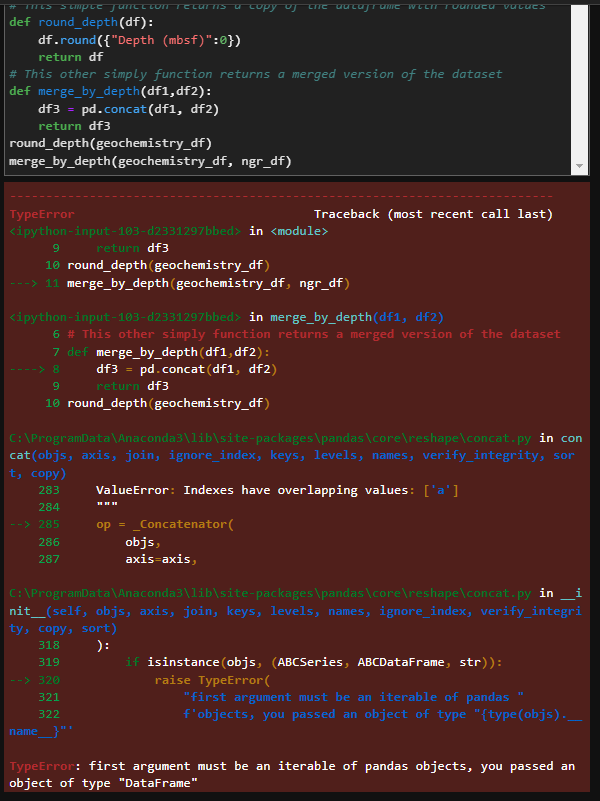# Feedback Form

In [97]:
%%html 
<iframe src="https://docs.google.com/forms/d/e/1FAIpQLScBFfWo24X8yTOSKaxHz1LK4jtKg9uUuxqjqS2i3YdjpDAb8w/viewform?usp=sf_link=en" width="800" height="600" frameborder="0" marginheight="0" marginwidth="0">Loading…</iframe>